# Veri Bilimi Temel Proje Örneği

Titanic veri seti üzerinden temel veri işleme, veri analizi ve analitiği üzerine bir notebook hazırladık. Titanic veri seti veri bilimine yeni başlayanlar için temel işlemleri anlama açısından önemli bir çıkış noktasıdır. 

Peki veri bilimci olarak nasıl bir çalışma stratejisi belirlemeliyiz. 
Çoğu zaman veriyi alıp çeşitli keşif analizleri yapılabilir.
Bu keşifler sonucunda çalışmanın genel hatlarını oluşturulup başlayabilirsiniz.
Ancak hangi aşamada olursa olsun sormamız gereken sorular vardır. 
Biz bu çalışma için, veriyi hiç görmeden temel bir hat oluşturacağız


1. Problem tanımı, bizden ne isteniyor?
2. Eğitim ve Test datalarımız mevcut mu?(Bu kursun kapsamında değil ancak yoksa veri toplama sürecine geçeriz)
3. Veriyi keşfet, temizle, analiz için hazırla.
4. İlk analizlerini oluştur, kuracağın model için veri dönüşümlerini yap.
5. Modeli oluştur, test et, problem sonucuna uygun cevaplar mı alıyorsun? (Hayır ise modeli ve modeli besleyen analizi
tekrar gözden geçir)
6. Sonuçları görselleştir, raporla, bulduğun en etkin çözümü sun.
7. Kullandığın veri, kütüphane, sistem versiyonları ve modeli detaylı anlatan bir çözüm kitapcığı hazırla.

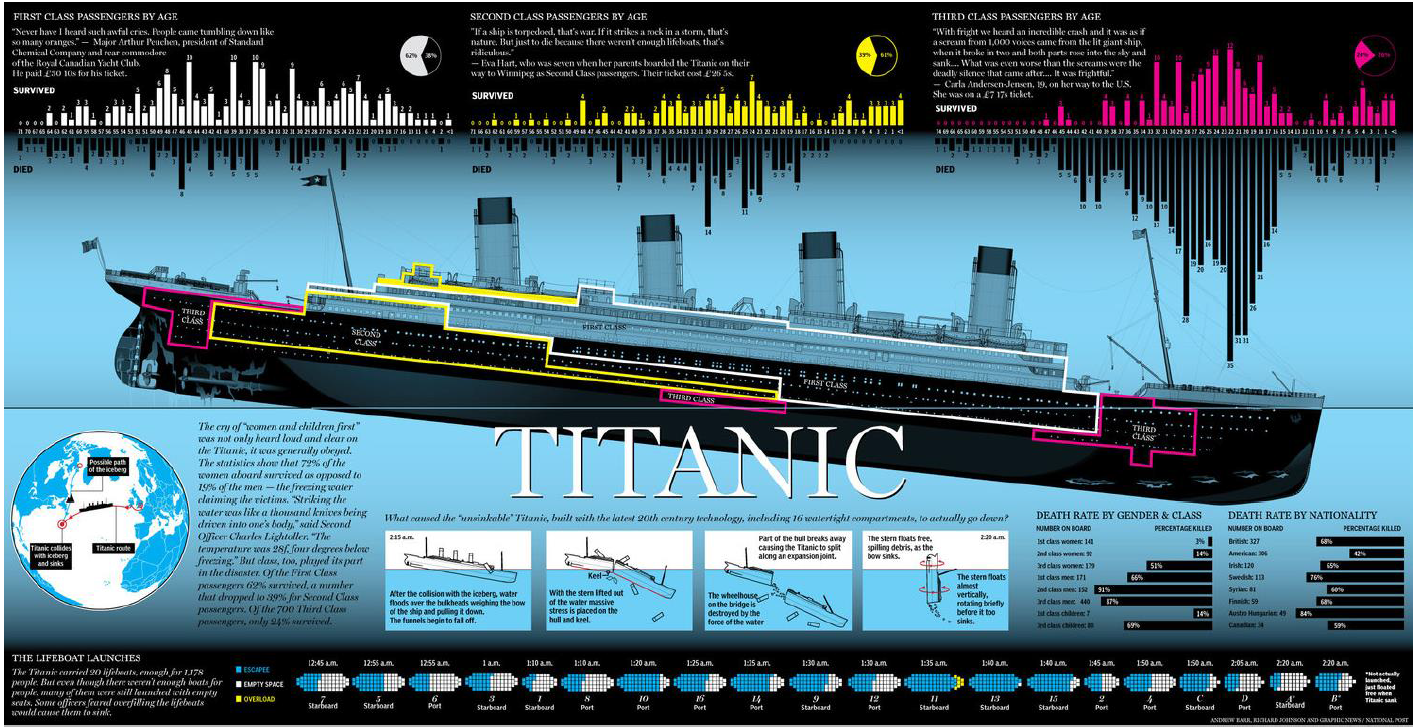

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

İlk olarak veri işleme, temizleme, hazırlama ve görselleştirme kütüphanelerini indirelim. Bu temel python eğitimi değildir. Python güçlü kütüphaneleri olan, veri bilimi ve yapay zeka uygulamalarında oldukça popüler bir programlama dilidir. Python temelleri için diğer eğitimlere bakmanızda fayda var. 

Genel bir kabul olarak kodlamada kullancağımız değişken ve fonksiyon isimleri kendilerini açıkayacak isimlerde olursa tekrar okunabilirliği artar. 

İş İhtiyacını Anladık - Verisini Bulalım ve İhtiyacımızı Karşılıyor mu İnceleyelim..

In [2]:
titanic_df = pd.read_csv("/content/titanic.csv", sep=',')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic_df.shape

(891, 12)

.shape önemili bir method. veri biliminde işlem yaptığımız verisetinin boyutları çok önemlidir. özellikle ileride makine öğrenmesi modelleri kullanırken, veri boyutlarının tutarlı olması gerekir. 

In [4]:
titanic_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Categorical : Survived , Sex, Embarked. 
Ordinal Category : PClass
Numerical : Age, Fare. 
Discrete Numerical : SibSp, Parch.

In [5]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

.value_counts() fonksiyonu birçok defa kullanacağımız veri setinin değişkenkleri/değişkenine ait değerleri grup bazında toplar. 

In [ ]:
titanic_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Bu işlemi tüm değişkenler için mi yapmamız gerekiyor? Veri görselleştirme işte tam bu işe yarıyor. Çok büyük veri setlerinde hem temel işlemler ile hem de görselleştirme araçları ile veri keşfi yapılır. 

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  age_group    714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


python .info() fonksiyonu veri setimizle ilgili temel bilgileri hızlıca bize verir. örneğin memory usage, non-null (boş olmayan) gözlem sayısı veri tipleri gibi. 

Veriyi Anlama:
Missing Analizi <br>
Outlier Analizi <br>
Görselleştirerek Dağılımları İnceleme <br>

In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age_group      177
dtype: int64

.isnull() ve .sum() yine python un hazır fonksiyonları ve bize her zaman kullanabileceğimiz bir kalıp sunuyor. boş gözlemlerin değişken bazında toplam değeri. 

In [ ]:
titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].value_counts()

Survived  Pclass  Sex     Age   SibSp  Parch  Ticket             Fare      Cabin    Embarked
1         1       female  24.0  0      0      PC 17477           69.3000   B35      C           2
0         1       female  2.0   1      2      113781             151.5500  C22 C26  S           1
1         1       female  58.0  0      0      113783             26.5500   C103     S           1
                          49.0  0      0      17465              25.9292   D17      S           1
                                1      0      PC 17572           76.7292   D33      C           1
                                                                                               ..
                          16.0  0      0      110152             86.5000   B79      S           1
                                       1      111361             57.9792   B18      C           1
                                              PC 17592           39.4000   D28      S           1
                         

Birden çok değişkene uygulanabilir ancak çok takip edilebilir bir sonuç değil.

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


.describe() fonksiyonu veri setindeki değişkenlerin istatistiki bilgilerinşi bize verir, toplam sayı, ortalama, standart sapma min/max değerleri ile quantil değerleri. Bu fonksiyon sadece numeric değişkenlerin istatiksel verilerini verir, character tipi olanları değerlenmeye almaz. 

In [ ]:
titanic_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Yukarıda info() fonksiyonuna bakarken bazı değişkenlerin object olduğunu görmüştük. include="O" methodu object tipi değişkenleri özetlemek için 

Yukarıdaki ilk veri incelemelerine göre bazı çıkarımlarımız olacak. 
1. Cabin / Age / Embarked verilerinde kayıp vei bulunmakta
2. Name değişkeni 891/891 unique değerde
3. Cabin ve Ticket değişkenlerinde duplicate veriler bulunmakta.

Bir veri analizine bakmadan önce "domain" bilgisine sahip olmak çok öenmlidir. Bu kazada kayıpların çoğunluğu
yeterli tahliye kayığı olmadığı için yaşanmış. Tahliye kayıklarına kadınlar/çocuklar ve üst sınıf yolcuların erişiminin daha çok olduğu varsayabiliriz. Üst sınıf yolcular Pclass da 1 indexli, Kadınlar Sex değişkeninde "female" indexli, çocuklarında yaş verilerinden çıkartılabilir. 

In [ ]:
#pivoting variables
titanic_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


.groupby() pivot oluşturmak için kullanılan, bir 

In [ ]:
titanic_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
titanic_df[["Age","Survived"]].groupby(["Age"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

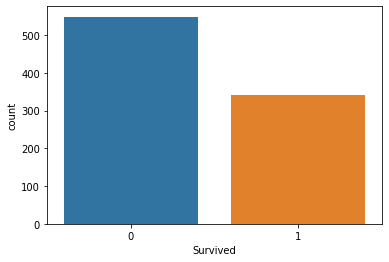

In [ ]:
sns.countplot(x=titanic_df["Survived"])

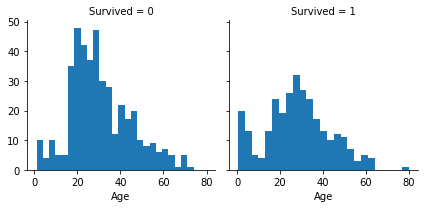

In [ ]:
age_plot = sns.FacetGrid(titanic_df,col="Survived")
age_plot.map(plt.hist,"Age",bins = 25)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages

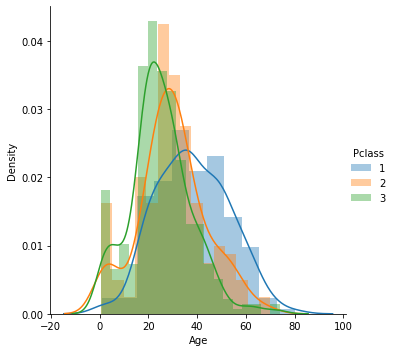

In [ ]:
sns.FacetGrid(titanic_df, hue = 'Pclass', height = 5)\
              .map(sns.distplot, 'Age')\
              .add_legend()

<Axes: xlabel='Pclass', ylabel='Age'>

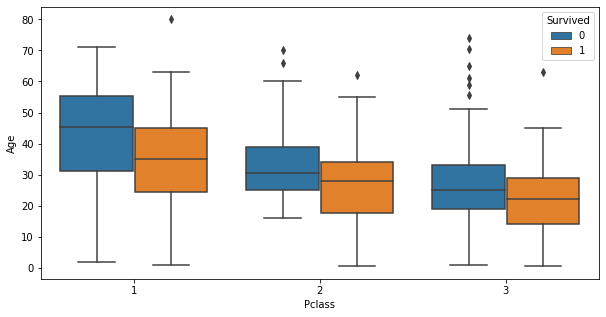

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Pclass",y="Age",data=titanic_df,hue="Survived")

In [ ]:
pd.cut(titanic_df["Age"],bins=[0,14,60,100],include_lowest=True,labels=["child","adult","elder"])

0      adult
1      adult
2      adult
3      adult
4      adult
       ...  
886    adult
887    adult
888      NaN
889    adult
890    adult
Name: Age, Length: 891, dtype: category
Categories (3, object): ['child' < 'adult' < 'elder']

In [ ]:
titanic_df["age_group"] = pd.cut(titanic_df["Age"],bins=[0,14,60,100],include_lowest=True,labels=["child","adult","elder"])

In [ ]:
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


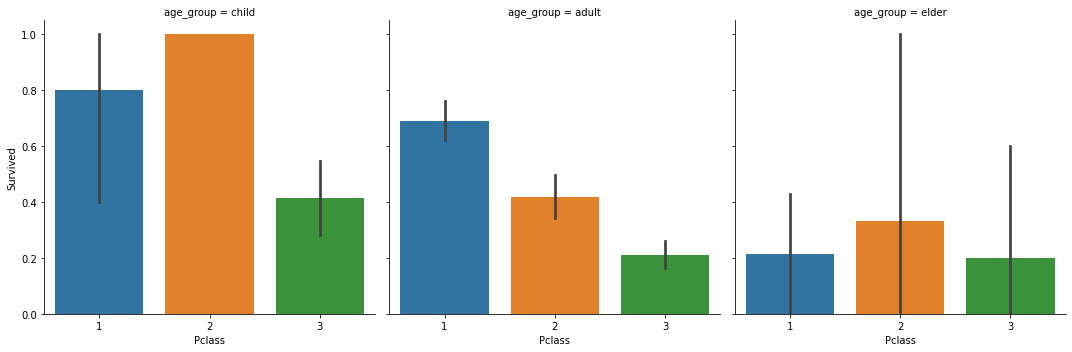

In [ ]:
sns.catplot(x="Pclass",y="Survived",col="age_group",data=titanic_df,kind="bar")

In [ ]:
sns.catplot(x="Embarked", y="Age", data = titanic_df, hue = "Sex");

In [ ]:
titanic_df.age_group.value_counts()

adult    615
child     77
elder     22
Name: age_group, dtype: int64

In [ ]:
titanic_df[titanic_df["age_group"] == "child"].Pclass.value_counts()

3    53
2    19
1     5
Name: Pclass, dtype: int64

In [ ]:
titanic_df[(titanic_df["age_group"] == "child") & (titanic_df["Survived"] == 1) ].Pclass.value_counts()

3    22
2    19
1     4
Name: Pclass, dtype: int64

In [ ]:
titanic_df[titanic_df["age_group"] == "adult"].Pclass.value_counts()

3    297
1    167
2    151
Name: Pclass, dtype: int64

In [ ]:
titanic_df[(titanic_df["age_group"] == "adult") & (titanic_df["Survived"] == 1) ].Pclass.value_counts()

1    115
2     63
3     62
Name: Pclass, dtype: int64

Missing Filling & Outlier Adjustment:

In [ ]:
#as we can see mean values for survived or not, male or female at 30. so we can impute 30.0
titanic_df["Age"].fillna(titanic_df["Age"].mean(),inplace=True)

In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age_group      177
dtype: int64

In [ ]:
titanic_df["Embarked"].fillna("S",inplace=True)

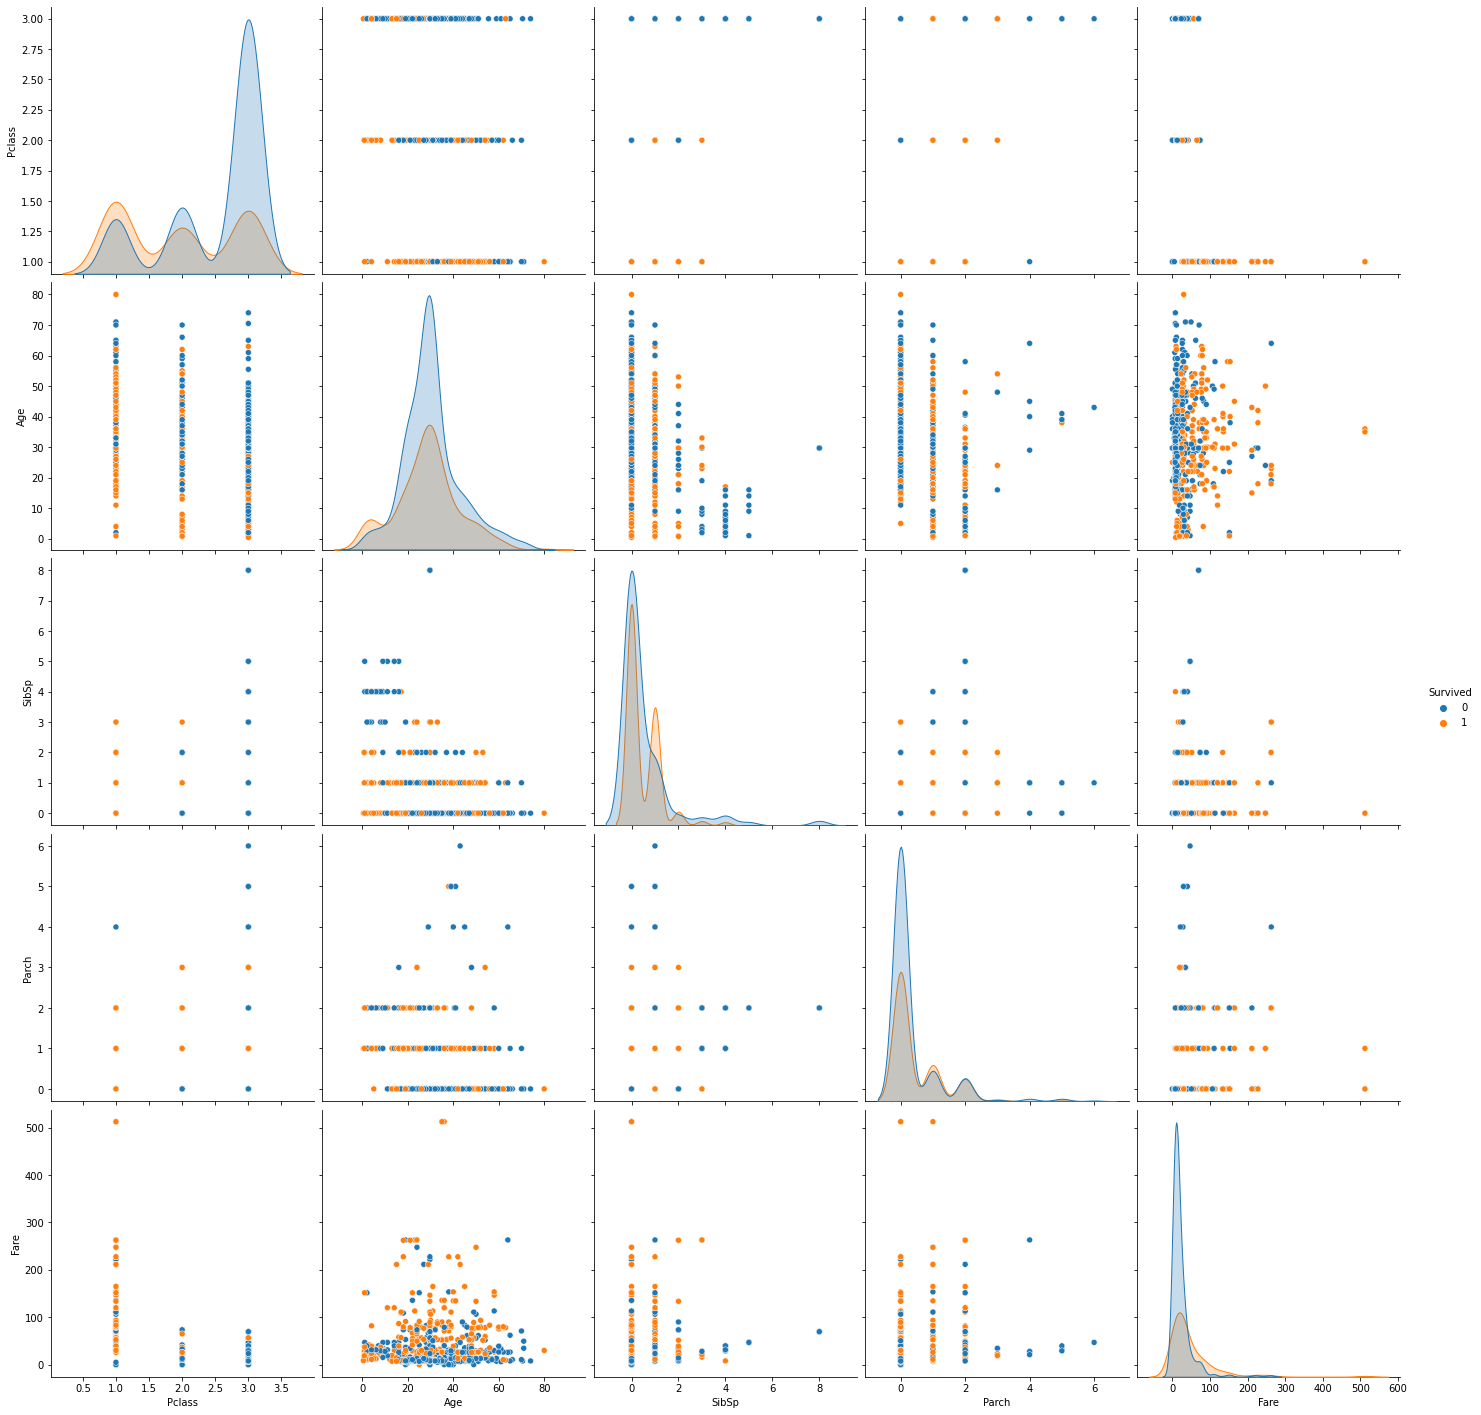

In [ ]:
sns.pairplot(titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']],hue ='Survived', height = 4)

Feature Engineering: <br>
time to create! şimdi yeni değişkenler yaratma zamanı. <br> 
buarada veriyi inceledikten sonra veri bilimci değişkenler hakkında bir öngörüye sahip olur. <br>
iyi bir veri bilimci kendisine verilenler ile yetinmez, yaratır. <br>

In [ ]:
titanic_df["family_size"] = titanic_df.SibSp + titanic_df.Parch + 1

In [ ]:
titanic_df["age_group"] = pd.cut(titanic_df["Age"],bins=[0,14,60,100],include_lowest=True,labels=["child","adult","elder"])

child, adult, elder açıklayıcılık anlamında çok iyi ancak ileride öğreneceğimiz gibi,
numeric kodlama 0,1,2 çok daha uygun olacaktır. böylece bir çok model için tekrar dönüşüm gerekmez. 

In [ ]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,family_size,fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,2,"(-0.513, 51.233]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,2,"(51.233, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,1,"(-0.513, 51.233]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,2,"(51.233, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,1,"(-0.513, 51.233]"


In [6]:
titanic_df["fare_group"] = pd.cut(titanic_df["Fare"],10,include_lowest=True)

In [9]:
titanic_df.Fare_group = pd.DataFrame()
titanic_df['Fare_group'] = np.where(titanic_df['Fare'] < 7, 'Low_Fare',
                              np.where(titanic_df["Fare"] < 14, "low_mid_Fare",
                                      np.where(titanic_df["Fare"] < 21, "mid_fare", 
                                              np.where(titanic_df["Fare"] < 28, "mid_high_fare", 
                                                      np.where(titanic_df["Fare"] < 35, "high_low_fare",
                                                              np.where(titanic_df["Fare"] < 42, "high_mid_fare",
                                                                      np.where(titanic_df["Fare"] < 49, "high_high_fare",
                                                                              np.where(titanic_df["Fare"] < 56, "top_fare",
                                                                                      np.where(titanic_df["Fare"] < 63, "max_fare", "out_top_fare")))))))))

<ipython-input-9-80a229a695ed>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  titanic_df.Fare_group = pd.DataFrame()


In [11]:
titanic_df['Age_group'] = 0
titanic_df.loc[titanic_df['Age']  <= 15, 'Age_group'] = 0
titanic_df.loc[(titanic_df['Age'] > 15) & (titanic_df['Age'] <= 30), 'Age_group']=1
titanic_df.loc[(titanic_df['Age'] > 30) & (titanic_df['Age'] <= 45), 'Age_group']=2
titanic_df.loc[(titanic_df['Age'] > 45) & (titanic_df['Age'] <= 60), 'Age_group']=3
titanic_df.loc[titanic_df['Age']  > 60, 'Age_group'] = 4

düzeltme için hızlıca verilere bakıp bir yazım yanlışı var mı, çok anlamsız bir sayısal veri var mı diye bakabiliriz. yukarıda ki genel veri incelemelerinde göze batan en büyük şey eksik verilerin olduğu değişkenlerdi. bundan sonra veri tamamlama yapabiliriz, ardından yüksek korelasyonlu değişkenleri çıkartarak modelin daha doğru tahminleme yapması için veriyi hazırlarız. Son olarak, verilerimizi makine öğrenmesi için daha anlamlı olan veri yapılarına çeviririz. 

In [ ]:
#cinsiyetler doğru mu acaba? baze male yerine Male yahut m yazılabilir. 
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
#peki bilet numarası? bilet numarası için tekrar bakalım
print(titanic_df.Ticket.value_counts())
titanic_df.Ticket.isnull().sum()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


0

<Axes: xlabel='Sex', ylabel='Age'>

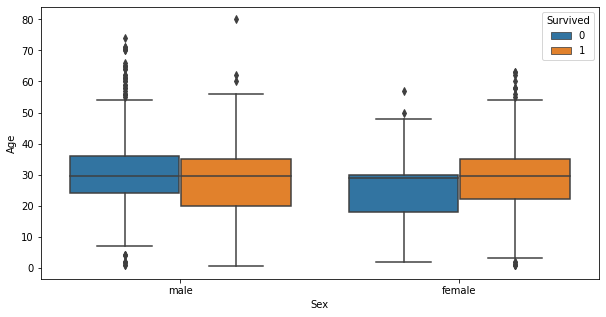

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Sex",y="Age",data=titanic_df,hue="Survived")

In [ ]:
titanic_df.fare_group.value_counts()

(-0.513, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(204.932, 256.165]     11
(256.165, 307.398]      6
(461.096, 512.329]      3
(153.699, 204.932]      2
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
Name: fare_group, dtype: int64

<Axes: >

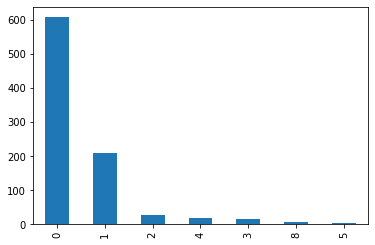

In [ ]:
# peki sibsp ve parch yerine sadece family size kullanabilir miyiz?
titanic_df.SibSp.value_counts().plot(kind="bar")

<Axes: >

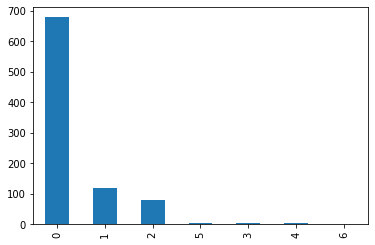

In [ ]:
titanic_df.Parch.value_counts().plot(kind="bar")

<Axes: >

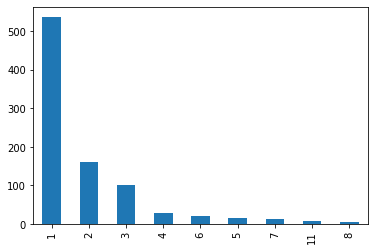

In [ ]:
titanic_df.family_size.value_counts().plot(kind="bar")

In [ ]:
#yukarıda görebileceğimiz gibi sadece family_size değişkeni ile oransallığı bozmadan değişkenlerimizi ifade ediyoruz.
titanic_df.drop(["SibSp","Parch"],axis=1,inplace=True)

In [ ]:
titanic_df.drop("Ticket",axis=1,inplace=True)

KeyError: ignored

In [ ]:
titanic_df.drop(["PassengerId","Name"],axis=1,inplace=True)

In [ ]:
titanic_df.drop(["Cabin"],axis=1,inplace=True)

In [ ]:
titanic_df.rename(columns={"Sex": "gender","Pclass": "class","Embarked":"station","Age": "age"},inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

LabelEncoder ve OneHotEncoder ne işe yarar, nasıl çalışır farkları nelerdir? Başka yöntemler var mıdır?

In [ ]:
titanic_df["age_code"] = label.fit_transform(titanic_df["age_group"])
titanic_df["fare_code"] =label.fit_transform(titanic_df["fare_group"])
titanic_df["gender_code"] = label.fit_transform(titanic_df["gender"])
titanic_df["station_code"] = label.fit_transform(titanic_df["station"])

In [ ]:
# not alın :) neler yaptık
# gender M -> 1 F -> 0 oldu
# station S -> 2 Q->1 C->0
#age_group adult -> 0 child -> 1 elder -> 2
# fare aşağıda

In [ ]:
titanic_df.fare_code.value_counts()

0    732
1    106
2     31
4     11
5      6
6      3
3      2
Name: fare_code, dtype: int64

In [ ]:
titanic_df.fare_group.value_counts()

(-0.513, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(204.932, 256.165]     11
(256.165, 307.398]      6
(461.096, 512.329]      3
(153.699, 204.932]      2
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
Name: fare_group, dtype: int64

In [ ]:
titanic_df.age_group.value_counts()

adult    792
child     77
elder     22
Name: age_group, dtype: int64

In [ ]:
titanic_df.age_code.value_counts()

0    792
1     77
2     22
Name: age_code, dtype: int64

In [ ]:
#Correlation - HeatMap

In [ ]:
titanic_df['age_code'].corr(titanic_df['fare_code'])

-0.0304920517909052

In [ ]:
titanic_df.corr()

,Survived,class,age,Fare,family_size,age_code,fare_code,gender_code,station_code
Survived,1.000000,-0.338481,-0.069809,0.257307,0.016639,0.048353,0.241056,-0.543351,-0.167675
class,-0.338481,1.000000,-0.331339,-0.549500,0.065997,-0.024162,-0.511367,0.131900,0.162098
age,-0.069809,-0.331339,1.000000,0.091566,-0.248512,-0.052756,0.098044,0.084153,-0.026749
Fare,0.257307,-0.549500,0.091566,1.000000,0.217138,0.021147,0.955632,-0.182333,-0.224719
family_size,0.016639,0.065997,-0.248512,0.217138,1.000000,0.260003,0.160274,-0.200988,0.066516
age_code,0.048353,-0.024162,-0.052756,0.021147,0.260003,1.000000,-0.030492,-0.007813,0.028096
fare_code,0.241056,-0.511367,0.098044,0.955632,0.160274,-0.030492,1.000000,-0.169287,-0.211688
gender_code,-0.543351,0.131900,0.084153,-0.182333,-0.200988,-0.007813,-0.169287,1.000000,0.108262
station_code,-0.167675,0.162098,-0.026749,-0.224719,0.066516,0.028096,-0.211688,0.108262,1.000000


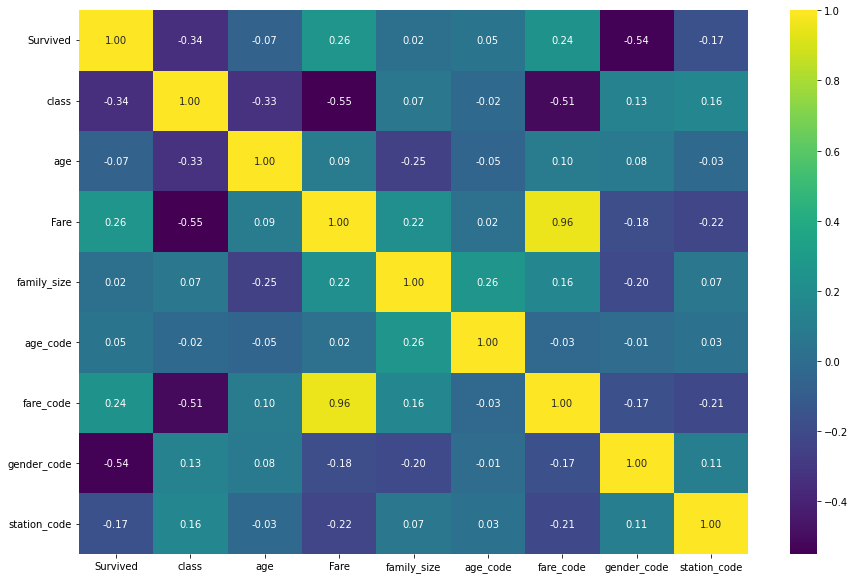

In [ ]:
plt.figure(figsize=(15,10))
correlation=titanic_df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap = 'viridis')
plt.show()

In [ ]:
titanic_df = titanic_df.drop(["gender","Fare","station","age_group","fare_group","age"],axis=1)

In [ ]:
titanic_df.head(5)

,Survived,class,Cabin,family_size,age_code,fare_code,gender_code,station_code
0,0,3,NaN,2,0,0,1,2
1,1,1,C85,2,0,1,0,0
2,1,3,NaN,1,0,0,0,2
3,1,1,C123,2,0,1,0,2
4,0,3,NaN,1,0,0,1,2


In [ ]:
#ready for take-off!!!

In [ ]:
X=titanic_df.drop(["Survived"],axis=1)
y=titanic_df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# problemi çözmek için seçilen aday algoritmalar: logistic regression ,decision tree, random forest

machine learning algoritmalarının altında yatan matematiği bilmek özellikle bir model kurmadan önce önemlidir. bu notebook un konusu dahilinde değil ancak birçok açık kaynak bu algoritmaları anlatmaktadır. 
örneğin logistic regression için; 
https://machinelearningmastery.com/logistic-regression-for-machine-learning/
python un en çok kullanılan makine öğrenmesi kütüphanesi sklearn (scikit learn) logistic regression modulü için;
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

yukarıda label encoder için yaptığımız gibi LogisticRegression modulü import edildikten sonra önce classifier ı bir değişkene atarız. bu sadece kullanım açısında değil kodun okunabilirliği açısından ve işlemek açısından çok önemlidir. 

In [ ]:
logReg = LogisticRegression()

label encoder gibi classifier çeşitleri sadece modele veriyi işlemekle değil aynı zamanda bir transformasyon yapmayı hedeflediği için fit ve transfor fonksiyonlarını beraber gerçekleştiren fit_transform fonksiyonunu kullanır. ancak logistic regessin classifier'ı için sadece fit() fonksiyonun kullnamamız gerekir. 

In [ ]:
logReg.fit(X_train,y_train)

LogisticRegression()

burada biraz duralım! fit() estimator fonksiyonu supervised learning modellerinde X -> sample y ->target verilerini alarak estimator fonksiyonuna işler. sadece bu iki veriyi aynı zamanda ağırlık serisi varsa sample_weight parametrelerini alarak ona göre veri desenini işleyebilir. biz default weight none olarak aldığı için buraya yazmayacağız. 

In [ ]:
y_pred = logReg.predict(X_test)

şimdi burada bir kez daha duralım, sklearn fit_predict() fonksiyonu mevcut, biz neden fit() ve predict() i ayrıca kullandık? fit() estimator ü ve predict() method u beraber aynı anda işlemek unsupervised learning için uygun bir method. bu tarz öğrenimde y -> none default değerinde olacaktır. 

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [ ]:
res = pd.DataFrame()
res["actual"] = y_test
res["pred"] = y_pred

In [ ]:
res.head(15)

,actual,pred
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
290,1,1
300,1,1
333,0,0
208,1,1
136,1,1


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       175
           1       0.73      0.73      0.73       120

    accuracy                           0.78       295
   macro avg       0.77      0.77      0.77       295
weighted avg       0.78      0.78      0.78       295



In [ ]:
#buarada sonucu okumak çok önemli precision nedir? recall nedir f1-score nedir? accuracy nasıl hesaplanır.?

https://medium.com/@raghaviadoni/evaluation-metrics-i-precision-recall-and-f1-score-3ec25e9fb5d3

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [ ]:
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_rf

array([[142,  33],
       [ 32,  88]])

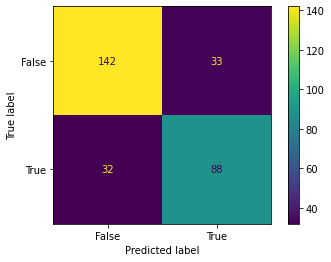

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.82


In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       175
           1       0.86      0.66      0.75       120

    accuracy                           0.82       295
   macro avg       0.83      0.79      0.80       295
weighted avg       0.82      0.82      0.81       295



In [ ]:
# biraz görselleştirelim mi?
import graphviz
from sklearn import tree

In [ ]:
dtc = dt.fit(X_train,y_train)

[Text(0.49525669642857145, 0.9545454545454546, 'x[4] <= 0.5\ngini = 0.467\nsamples = 596\nvalue = [374, 222]'),
 Text(0.20907738095238096, 0.8636363636363636, 'x[0] <= 2.5\ngini = 0.4\nsamples = 206\nvalue = [57, 149]'),
 Text(0.1130952380952381, 0.7727272727272727, 'x[1] <= 3.5\ngini = 0.072\nsamples = 107\nvalue = [4, 103]'),
 Text(0.07142857142857142, 0.6818181818181818, 'x[3] <= 0.5\ngini = 0.043\nsamples = 90\nvalue = [2, 88]'),
 Text(0.05952380952380952, 0.5909090909090909, 'x[0] <= 1.5\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.03571428571428571, 0.5, 'x[5] <= 1.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.023809523809523808, 0.4090909090909091, 'x[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.011904761904761904, 0.3181818181818182, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.03571428571428571, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.047619047619047616, 0.4090909090909091, 'gini = 0.0\nsamples = 

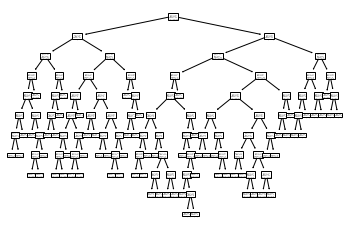

In [ ]:
tree.plot_tree(dtc)

In [ ]:
feat_names = list(X_train.columns.values)

In [ ]:
dtc_data = tree.export_graphviz(dtc, out_file=None, feature_names=feat_names) 
graph = graphviz.Source(dtc_data)

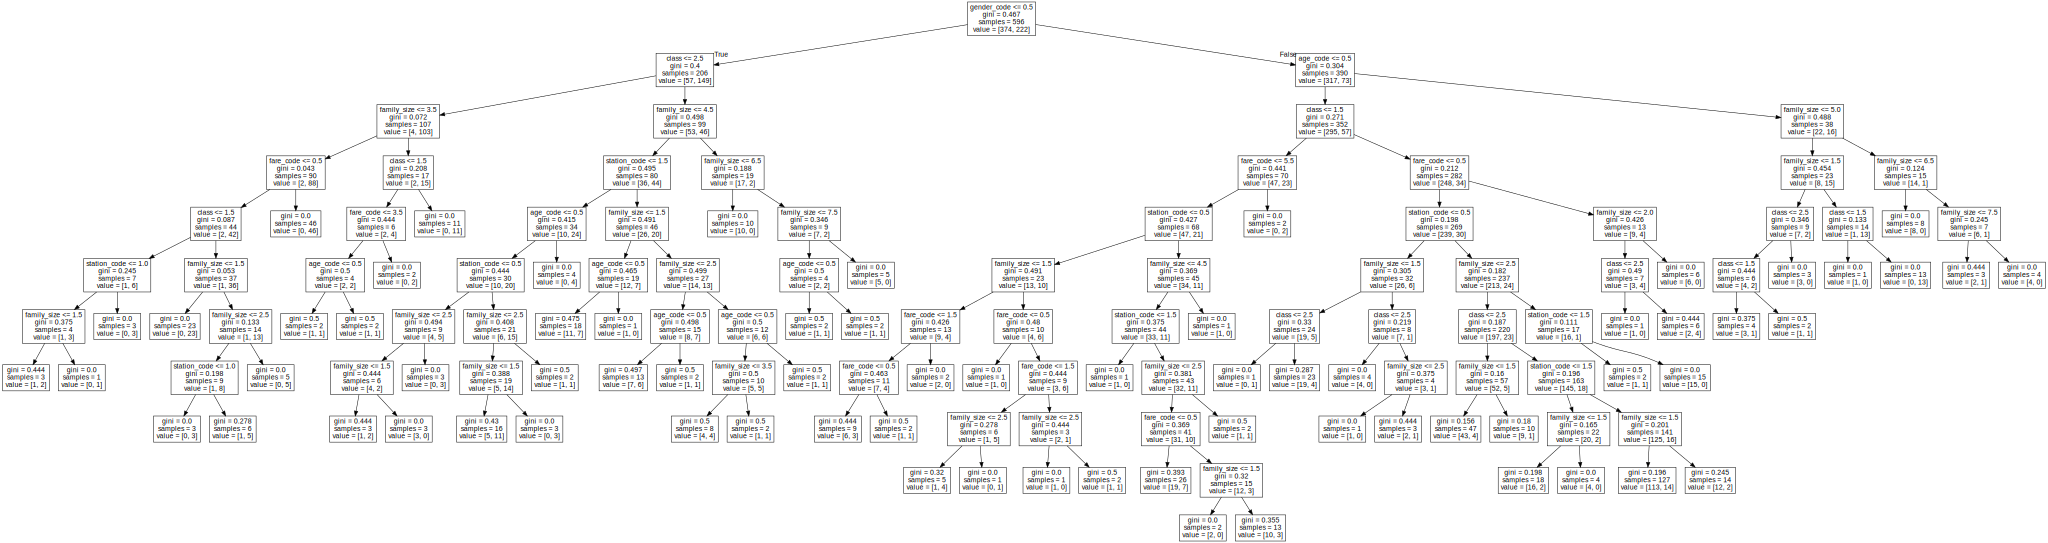

In [ ]:
graph

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
y_pred_rf=clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       175
           1       0.82      0.66      0.73       120

    accuracy                           0.80       295
   macro avg       0.81      0.78      0.79       295
weighted avg       0.81      0.80      0.80       295



In [ ]:
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
cnf_matrix_rf

array([[158,  17],
       [ 41,  79]])

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

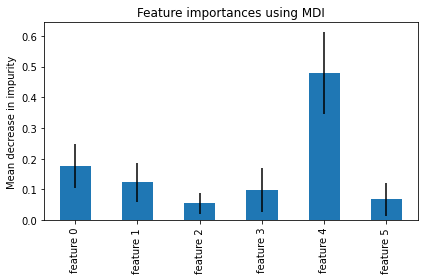

In [ ]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()